In [109]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
import numpy as np
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv("immSurvey.csv")
data.head()

,Unnamed: 0,ids,X.1,textToSend,Means,stanMeans,X,MetaID,treatment,pid_rep,...,RunAll,mergeIDs,stanMeansNewSys,stanSDsNewSys,coderMeans,newDocIDS,stanMeansNewSys2,stanSDsNewSys2,stanMeansNewSysPooled,stanSDsNewSysPooled
0,1,6606,1,problems caused by the influx of illegal immig...,0.750000,2.409768,1,0,1,1.00000,...,0.750291,240,1.919906,0.549770,1.5,10335,1.106977,0.320538,1.465566,0.288474
1,2,6607,2,"if you mean illegal immigration, i'm afraid of...",0.875000,3.710615,2,0,1,1.00000,...,1.011095,75,-0.138688,0.302764,1.0,10336,-0.223681,0.300575,-0.166691,0.219645
2,3,6608,3,that they should enter the same way my grandpa...,0.416667,-1.437706,3,0,0,0.33300,...,-0.219371,271,-0.334633,0.291336,0.0,10337,0.825119,0.317955,0.224096,0.220390
3,4,6609,4,legally entering the usa meeting the requireme...,0.458333,0.655503,4,0,0,0.50000,...,0.329845,181,0.386023,0.294324,1.5,10338,0.679629,0.305606,0.629995,0.221096
4,5,6610,5,terror bombings killing us robbing america,0.875000,5.337525,5,0,1,0.66667,...,1.955240,261,0.102707,0.274519,2.0,10339,1.206389,0.370577,0.574416,0.216228


In [111]:
alph = data['stanMeansNewSysPooled']
print(alph)

0      1.465566
1     -0.166691
2      0.224096
3      0.629995
4      0.574416
         ...   
335   -0.550042
336    0.675746
337    0.043779
338   -0.234177
339    0.730307
Name: stanMeansNewSysPooled, Length: 340, dtype: float64


In [112]:
texts = data['textToSend']
print(texts)

0      problems caused by the influx of illegal immig...
1      if you mean illegal immigration, i'm afraid of...
2      that they should enter the same way my grandpa...
3      legally entering the usa meeting the requireme...
4             terror bombings killing us robbing america
                             ...                        
335    those people that are here illegally should be...
336    racism & xenophobia make me worried!  also, co...
337    that immigrants are the heart and soul and the...
338                        job security for our citizens
339    public safety, effect on the economy, whether ...
Name: textToSend, Length: 340, dtype: object


## Extraction of Word Frequency

In [113]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(texts)
print(x)

  (0, 1014)	1
  (0, 213)	1
  (0, 196)	1
  (0, 1287)	3
  (0, 702)	1
  (0, 913)	3
  (0, 658)	1
  (0, 673)	1
  (0, 1433)	1
  (0, 90)	1
  (0, 310)	1
  (0, 932)	1
  (0, 1126)	1
  (0, 77)	2
  (0, 633)	2
  (0, 818)	1
  (0, 790)	1
  (0, 408)	1
  (0, 1034)	1
  (0, 207)	1
  (0, 685)	1
  (1, 913)	1
  (1, 658)	1
  (1, 1433)	1
  (1, 685)	1
  :	:
  (338, 235)	1
  (339, 1287)	1
  (339, 77)	2
  (339, 649)	1
  (339, 1286)	2
  (339, 1298)	2
  (339, 783)	1
  (339, 775)	1
  (339, 447)	1
  (339, 452)	1
  (339, 721)	1
  (339, 1314)	1
  (339, 917)	1
  (339, 637)	1
  (339, 904)	3
  (339, 1363)	1
  (339, 1028)	1
  (339, 425)	1
  (339, 926)	1
  (339, 1440)	1
  (339, 1047)	2
  (339, 1119)	1
  (339, 431)	1
  (339, 1429)	1
  (339, 1380)	1


In [114]:
data_vec = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
data_vec.head()

,11,12,125,18,1b,600,95,able,abolition,aboration,...,wreckless,wrong,wrongly,xenophobia,years,yet,you,young,your,yrars
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, alph, random_state=1)
constant_k =  RBF(length_scale=1.0) * ConstantKernel(1.0)
guassian_r = GaussianProcessRegressor(kernel=constant_k, alpha=1e-8)
guassian_r.fit(Xtrain.toarray(),ytrain)
mus, cov = guassian_r.predict(Xtest.toarray(), return_cov=True)
cov = np.corrcoef(ytest, mus)
print(cov)

[[1.         0.63286059]
 [0.63286059 1.        ]]


Correlation betwwen test and mus is  around 0.63

In [116]:
covs = [cov[0][1]]

# With Bigrams

In [117]:
big_vector = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
x = big_vector.fit_transform(texts)
big_data = pd.DataFrame(x.toarray(), columns=big_vector.get_feature_names())
big_data.head()

,1,1 3,1 became,1 boarders,1 difficult,1 immigrants,1 is,1 language,1 not,11,...,you think,you want,young,young from,your,your poor,your tired,your weak,yrars,yrars ago
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, alph, random_state=1)
constant_k =  RBF(length_scale=1.0) * ConstantKernel(1.0)
guassian_r = GaussianProcessRegressor(kernel=constant_k, alpha=1e-8)
guassian_r.fit(Xtrain.toarray(),ytrain)
mus, cov = guassian_r.predict(Xtest.toarray(), return_cov=True)
cov = np.corrcoef(ytest, mus)
print(cov)

[[1.         0.60884502]
 [0.60884502 1.        ]]


Correlation betwwen test and mus become  around 0.60 with bigrams

In [119]:
covs.append(cov[0][1])

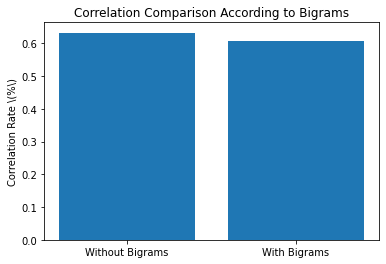

In [120]:
plt.bar(['Without Bigrams', 'With Bigrams'],covs)
plt.ylabel('Correlation Rate \(%\)')
plt.title('Correlation Comparison According to Bigrams')
plt.show()